<a href="https://colab.research.google.com/github/rafae1franco/BreastCancer_evaluate/blob/main/BreastCancer_evaluate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
# Carregar os dados
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data'
columns = ['id', 'diagnosis'] + [f'feature_{i}' for i in range(1, 31)]
data = pd.read_csv(url, header=None, names=columns)

# Mapear os valores da coluna "diagnosis"
data['diagnosis'] = data['diagnosis'].map({'M': 1, 'B': 0})

# Separar as features e os rótulos
X = data.drop(['id', 'diagnosis'], axis=1)
y = data['diagnosis']

In [13]:
# Dividir os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
# Normalizar os dados com StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Converter para arrays NumPy
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [5]:
# Criar o modelo
model = tf.keras.Sequential([
    tf.keras.layers.Dense(30, input_shape=(30,), activation='relu'),
    tf.keras.layers.Dense(15, activation='relu'),
    tf.keras.layers.Dense(15, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
# Compilar o modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Treinar o modelo
model.fit(X_train, y_train, epochs=150, batch_size=10, validation_split=0.1)

Epoch 1/150
41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 1.0000 - loss: 7.2586e-05 - val_accuracy: 0.9783 - val_loss: 0.0223
Epoch 2/150
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 2.5476e-05 - val_accuracy: 0.9783 - val_loss: 0.0308
Epoch 3/150
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 9.5412e-06 - val_accuracy: 0.9783 - val_loss: 0.0287
Epoch 4/150
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 9.9813e-06 - val_accuracy: 0.9783 - val_loss: 0.0317
Epoch 5/150
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 5.3206e-06 - val_accuracy: 0.9783 - val_loss: 0.0294
Epoch 6/150
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 6.4687e-06 - val_accuracy: 0.9783 - val_loss: 0.0295
Epoch 7/150
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 3.6855e-06 - val_accuracy: 0.9783 - val_loss: 0.0317
Epoch 8/150
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 2.740

In [16]:
# Função para prever o diagnóstico com base em um conjunto de features
def predict_breast_cancer(features):
    # Converte as features para um DataFrame com as mesmas colunas do treinamento
    features_df = pd.DataFrame([features], columns=X.columns)
    features_scaled = scaler.transform(features_df)
    prediction = model.predict(features_scaled)
    return 'Maligno' if prediction[0] > 0.5 else 'Benigno'

# Avaliar o modelo nos dados de teste
y_pred = model.predict(X_test)
y_pred = [1 if pred > 0.5 else 0 for pred in y_pred]

# Calcular e imprimir a acurácia
accuracy = accuracy_score(y_test, y_pred)
print(f'Model Accuracy: {accuracy * 100:.2f}%')

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Model Accuracy: 96.49%


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Previsao: Maligno, Atual: Benigno


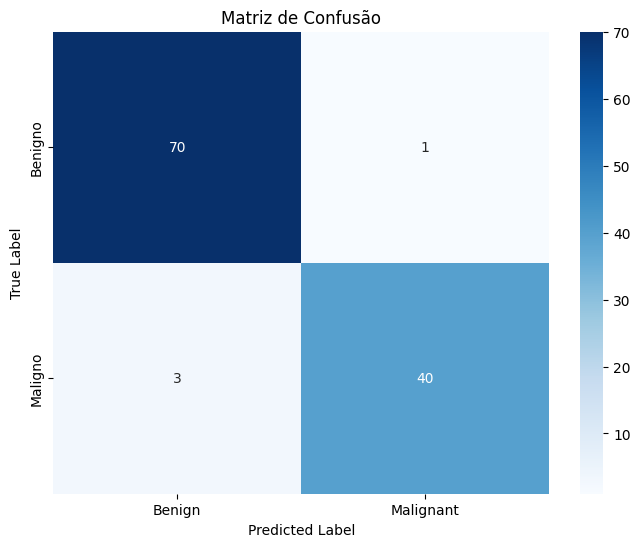

In [17]:
# Exemplo de previsão com um conjunto de features do teste
example_features = X_test[0]
print(f'Previsao: {predict_breast_cancer(example_features)}, Atual: {"Maligno" if y_test[0] == 1 else "Benigno"}')

# Matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malignant'], yticklabels=['Benigno', 'Maligno'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Matriz de Confusão')
plt.show()